# 2 Linear Dimensionality Reduction

## 2.1 Principal Component Analysis (PCA)

### 2.1.1 Practical Questions

###     (1)

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

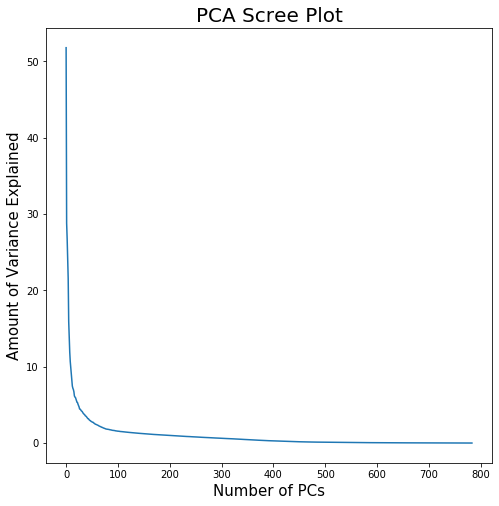

In [2]:
dataB = pd.read_csv('./DataB.csv', index_col = 0)
features = dataB.drop(['gnd'], axis=1)
features = features.values

# center the features
scaler = StandardScaler()
features = scaler.fit_transform(features)

# fit PCA
pca = PCA()
pca.fit(features)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Number of PCs', fontsize = 15)
ax.set_ylabel('Amount of Variance Explained', fontsize = 15)
ax.set_title('PCA Scree Plot', fontsize = 20)
ax.plot(range(pca.explained_variance_.shape[0]), pca.explained_variance_)

Around numbers of PC = 30, has a good cut-off point.

### (2)

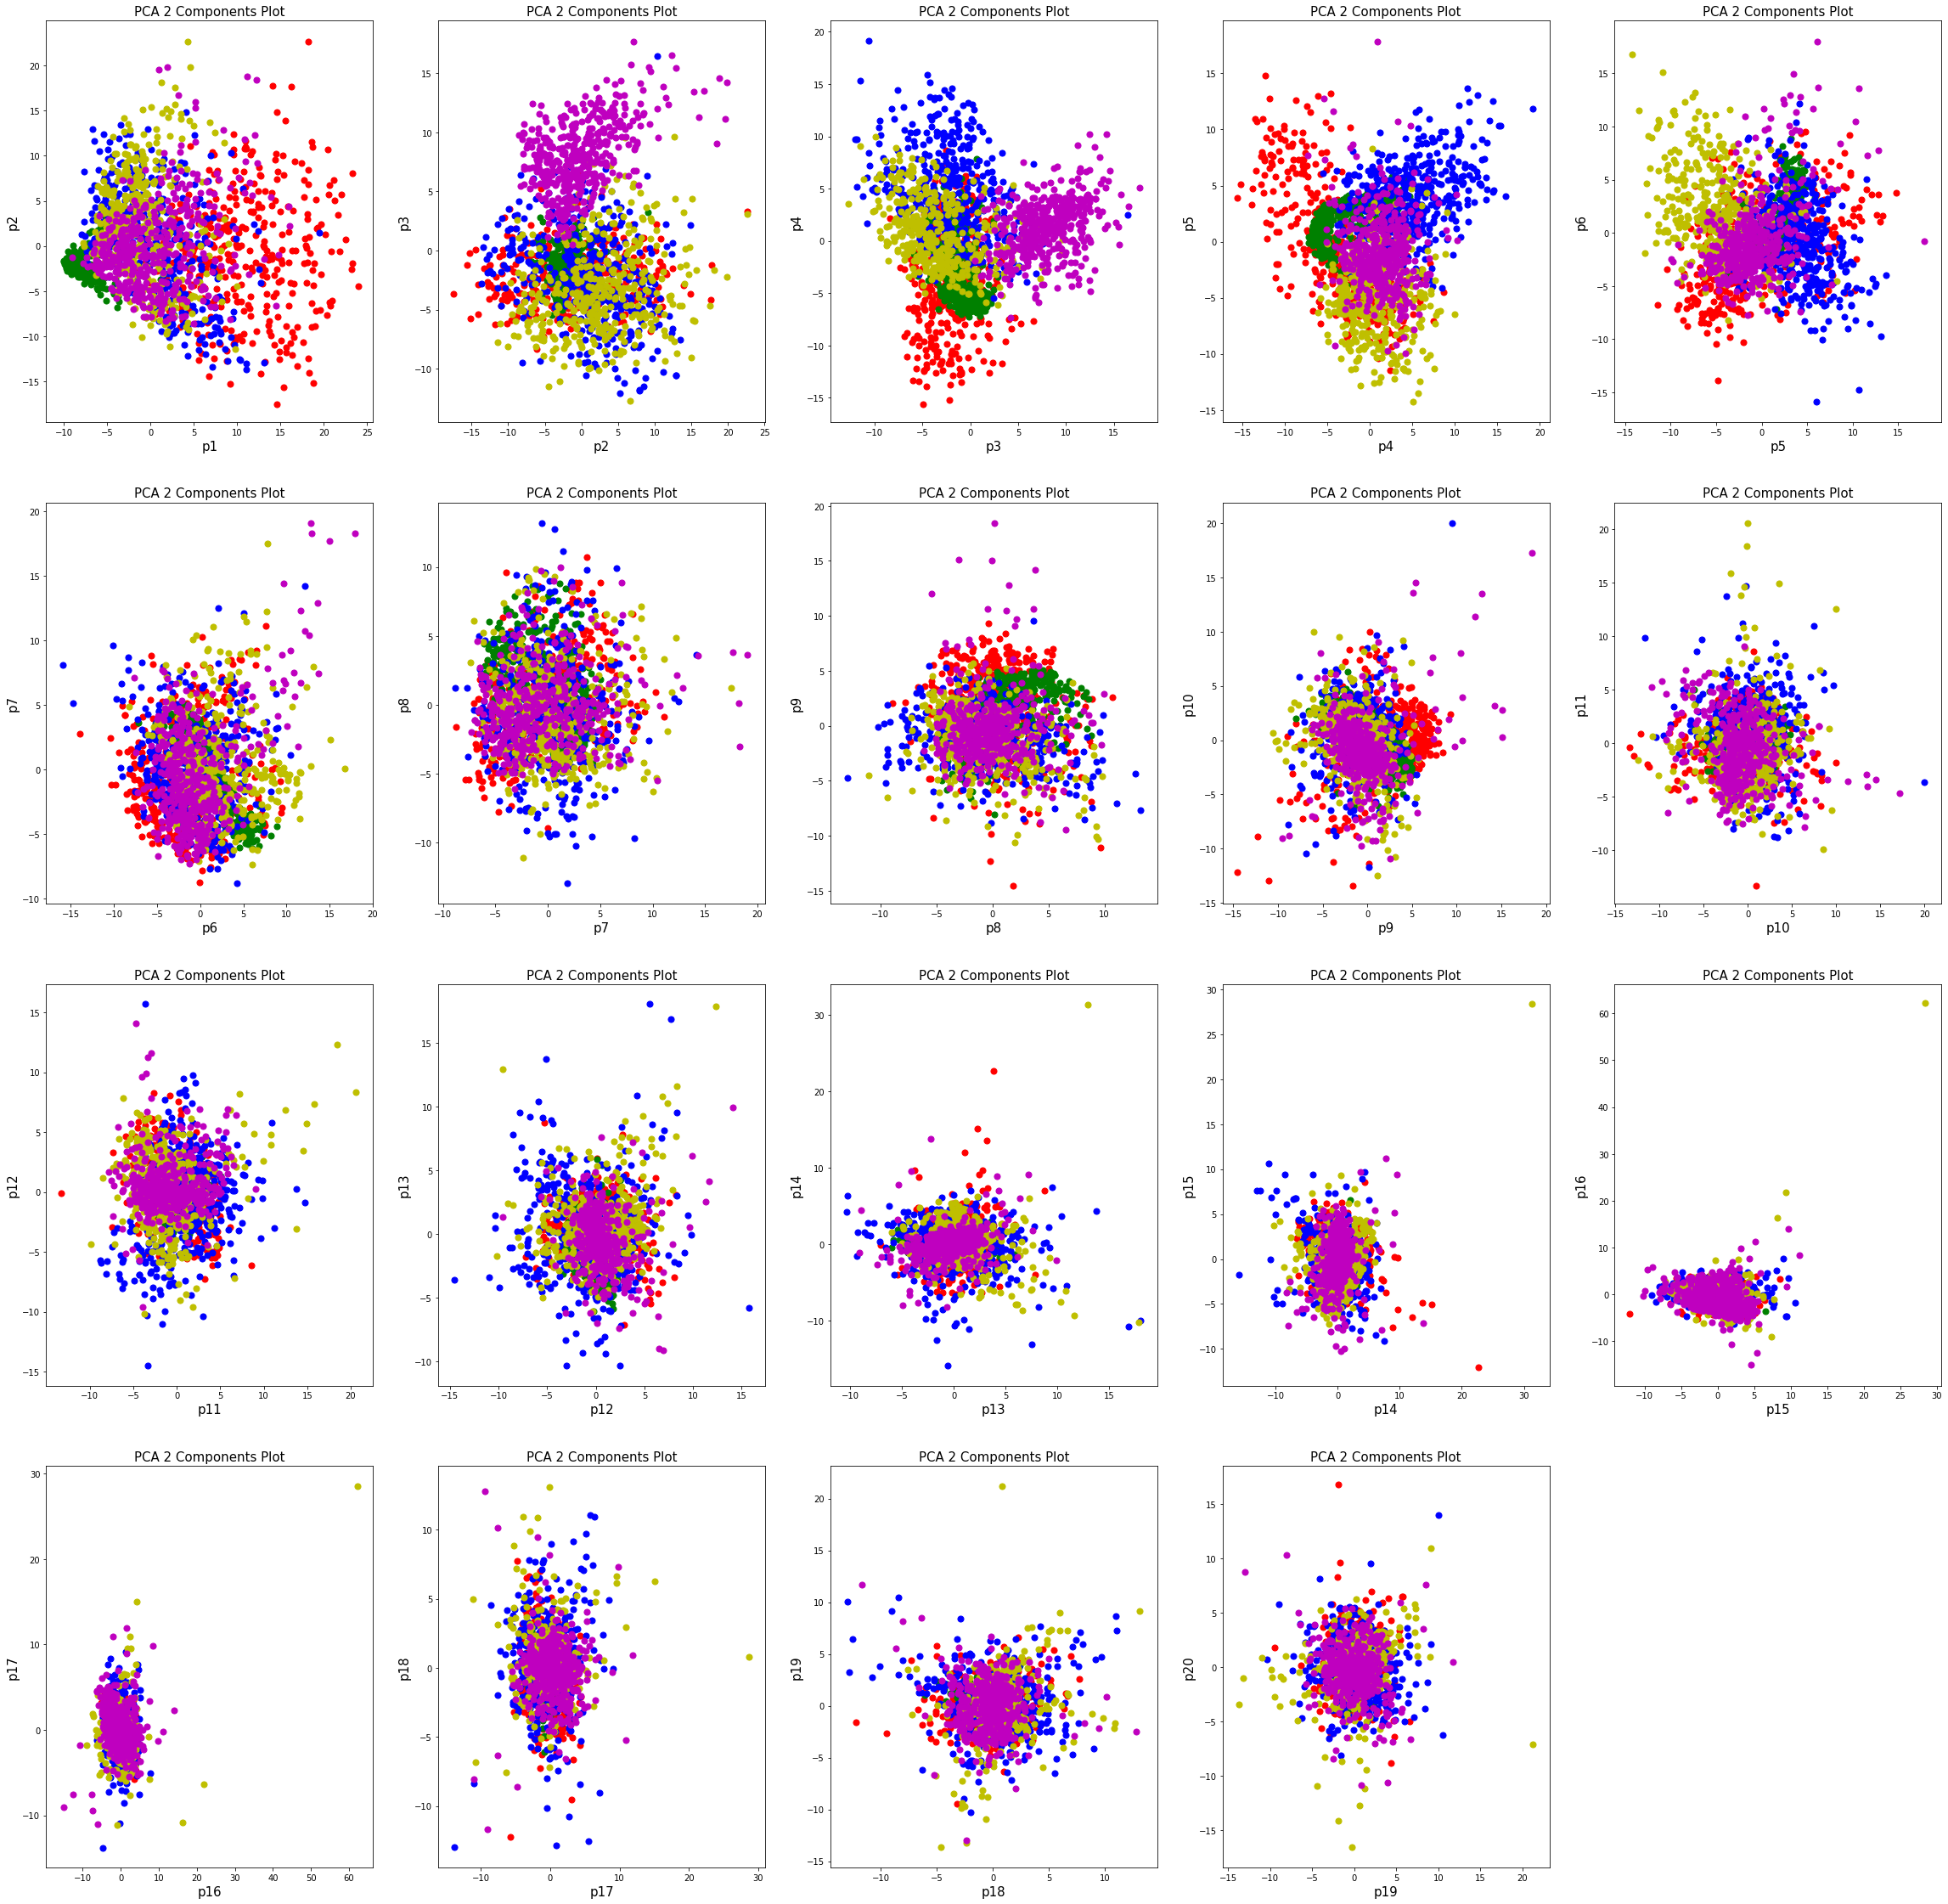

In [3]:
pca_top20_components = pca.components_[:20,:]
pca_top20_transformed = np.dot(features, pca_top20_components.T)
# convert to dataframe for plotting
pca_top20_transformed_df = pd.DataFrame(data = pca_top20_transformed, 
                                       columns=['p1','p2','p3','p4',
                                                'p5','p6','p7','p8',
                                                'p9','p10','p11','p12',
                                                'p13','p14','p15','p16',
                                                'p17','p18','p19','p20',])
pca_top20_transformed_df.index += 1
pca_top20_transformed_df = pd.concat([pca_top20_transformed_df, dataB[['gnd']]], axis=1)
targets = [0,1,2,3,4]
colors = ['r', 'g', 'b', 'y', 'm']
column_names = pca_top20_transformed_df.columns

fig = plt.figure(figsize=(40,40))

for i in range(1,20):
    plt.subplot(4, 5, i)
    plt.title('PCA 2 Components Plot', fontdict={'fontsize': 15})
    j = i - 1
    
    plt.xlabel(column_names[j], fontdict={'fontsize': 15})
    plt.ylabel(column_names[i], fontdict={'fontsize': 15})
    
    for target, color in zip(targets,colors):
            indicesToKeep = pca_top20_transformed_df['gnd'] == target
            plt.scatter(pca_top20_transformed_df.loc[indicesToKeep, column_names[j]]
               , pca_top20_transformed_df.loc[indicesToKeep, column_names[i]]
               , c = color
               , s = 50)

There is not a clear point to cut off the dimensions. Plot the top 20 eigenvalues, which means we will plot 19 figs which compare between different eigenvalues. And as we plot above, we can tell that the former figs are better than the latter ones. For instance, PC1 and PC2 plot is better than PC19 and PC20. And the classification is more obvious as well.

### (3)

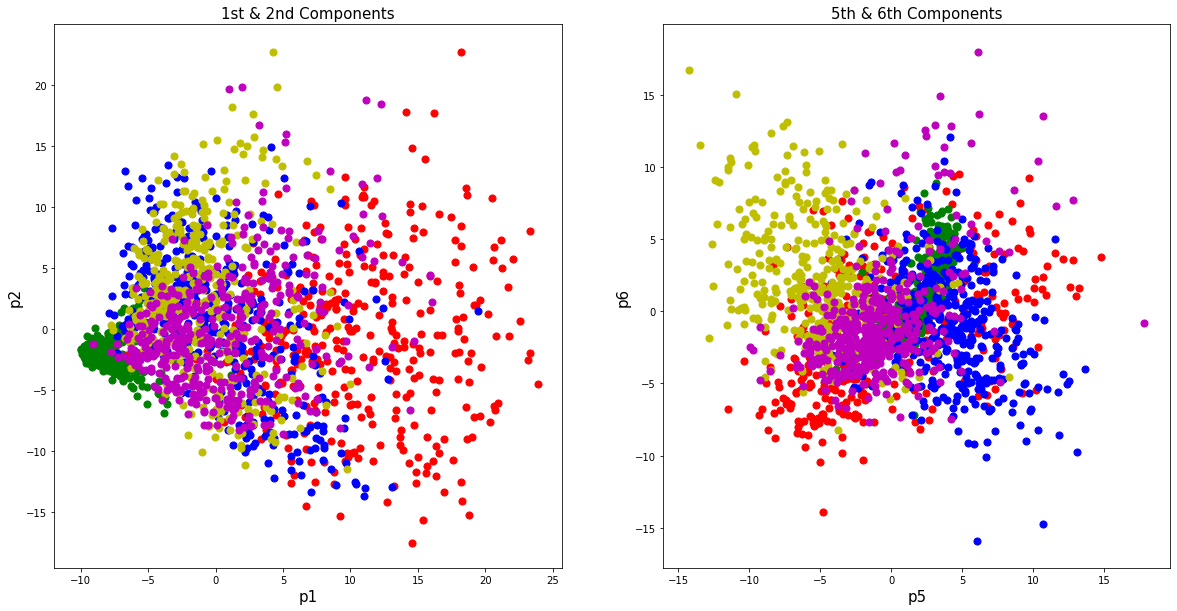

In [4]:
fig = plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
plt.title('1st & 2nd Components', fontdict={'fontsize': 15})

plt.xlabel(column_names[0], fontdict={'fontsize': 15})
plt.ylabel(column_names[1], fontdict={'fontsize': 15})

for target, color in zip(targets,colors):
    indicesToKeep = pca_top20_transformed_df['gnd'] == target
    plt.scatter(pca_top20_transformed_df.loc[indicesToKeep, column_names[0]]
           , pca_top20_transformed_df.loc[indicesToKeep, column_names[1]]
           , c = color
           , s = 50)
    
plt.subplot(1, 2, 2)
plt.title('5th & 6th Components', fontdict={'fontsize': 15})

plt.xlabel(column_names[4], fontdict={'fontsize': 15})
plt.ylabel(column_names[5], fontdict={'fontsize': 15})

for target, color in zip(targets,colors):
    indicesToKeep = pca_top20_transformed_df['gnd'] == target
    plt.scatter(pca_top20_transformed_df.loc[indicesToKeep, column_names[4]]
           , pca_top20_transformed_df.loc[indicesToKeep, column_names[5]]
           , c = color
           , s = 50)



We can tell there are 5 classes in these two figs. Honestly, the classification on PC5 and PC6 figure is better than PC1 and PC2 fig. The PC5&6 fig has a clearer boundary and five different center of these classes, which has not that much overlapping and can classified easily. The PC1&2 fig, there are many overlap points and stuck in together. Although we tell them from five different colors in PC5&6, they are still overlapping together. Also, this PC1&2 figure has some same centered classes which is kind of hard to tell which and where the classes are.

### (4)

In [5]:
imp = dataB.drop(['gnd'], axis=1)
start = time.time()

meanValues = np.mean(imp ,axis=0)
meanRemoved = imp - meanValues

X = np.transpose(meanRemoved)

P = np.dot(X, np.transpose(X))
eigVals, eigVects = np.linalg.eig(P)
U = eigVects

Y = np.transpose(np.dot(np.transpose(U), X))

end = time.time()

print('PCA: ' + str(end-start))

start1 = time.time()

A = np.dot(np.transpose(X), X)
eigValsA, eigVectsA = np.linalg.eig(A)
B = np.diag(np.sqrt(eigValsA))


V = eigVectsA

Y = np.dot(B, np.transpose(V))

end1 = time.time()

print('dual PCA: ' + str(end1-start1))

PCA: 0.39658379554748535
dual PCA: 2.9223906993865967


The implement of PCA is better than dual PCA. We use time() function to compute the end.time – start.time to get the time. Due to the exact time we compute, we can easily say PCA is better in this situation. But actually, the time usually depends on the algorithm and the computer hardware.

## 2.1.2 Theoretical Question

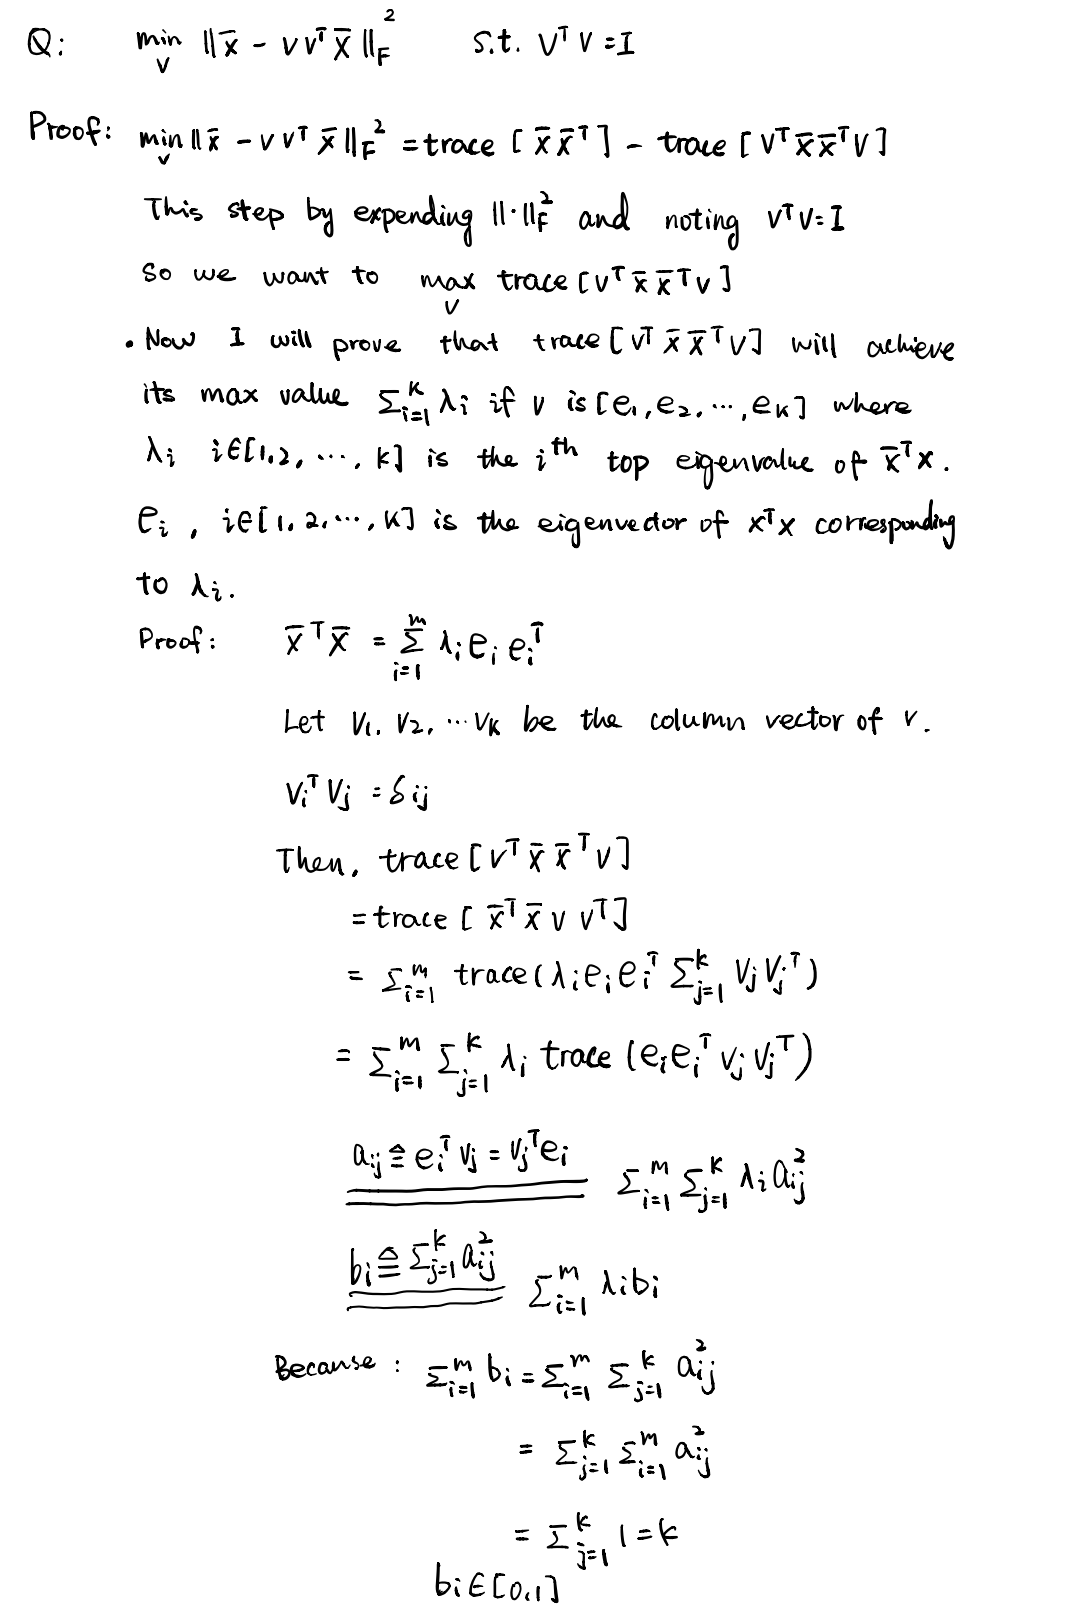

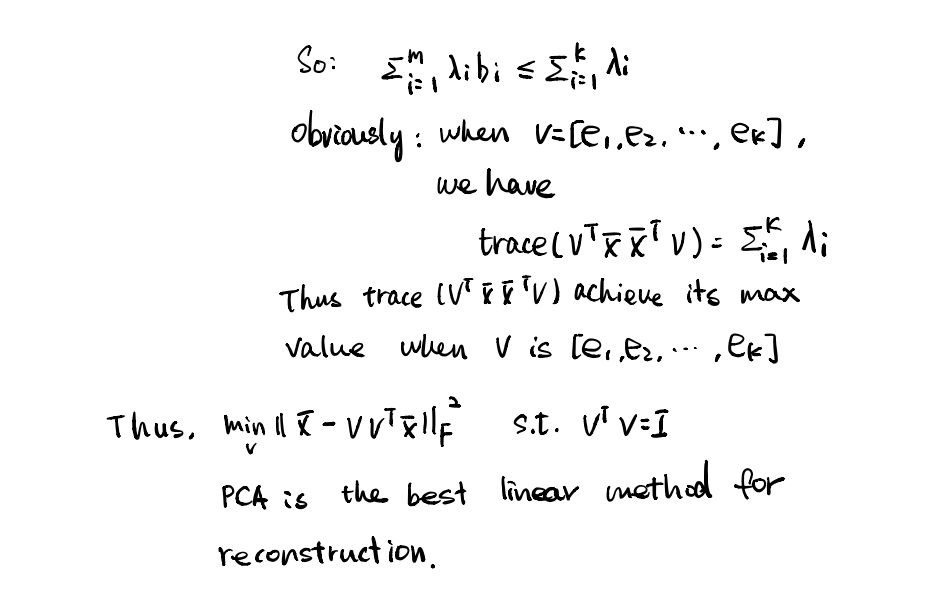

## 2.2 Fisher Discriminant Analysis (FDA)

### 2.2.1 Practical Questions

### (1)

AxesSubplot(0.125,0.536818;0.352273x0.343182)
AxesSubplot(0.547727,0.536818;0.352273x0.343182)
AxesSubplot(0.125,0.125;0.352273x0.343182)


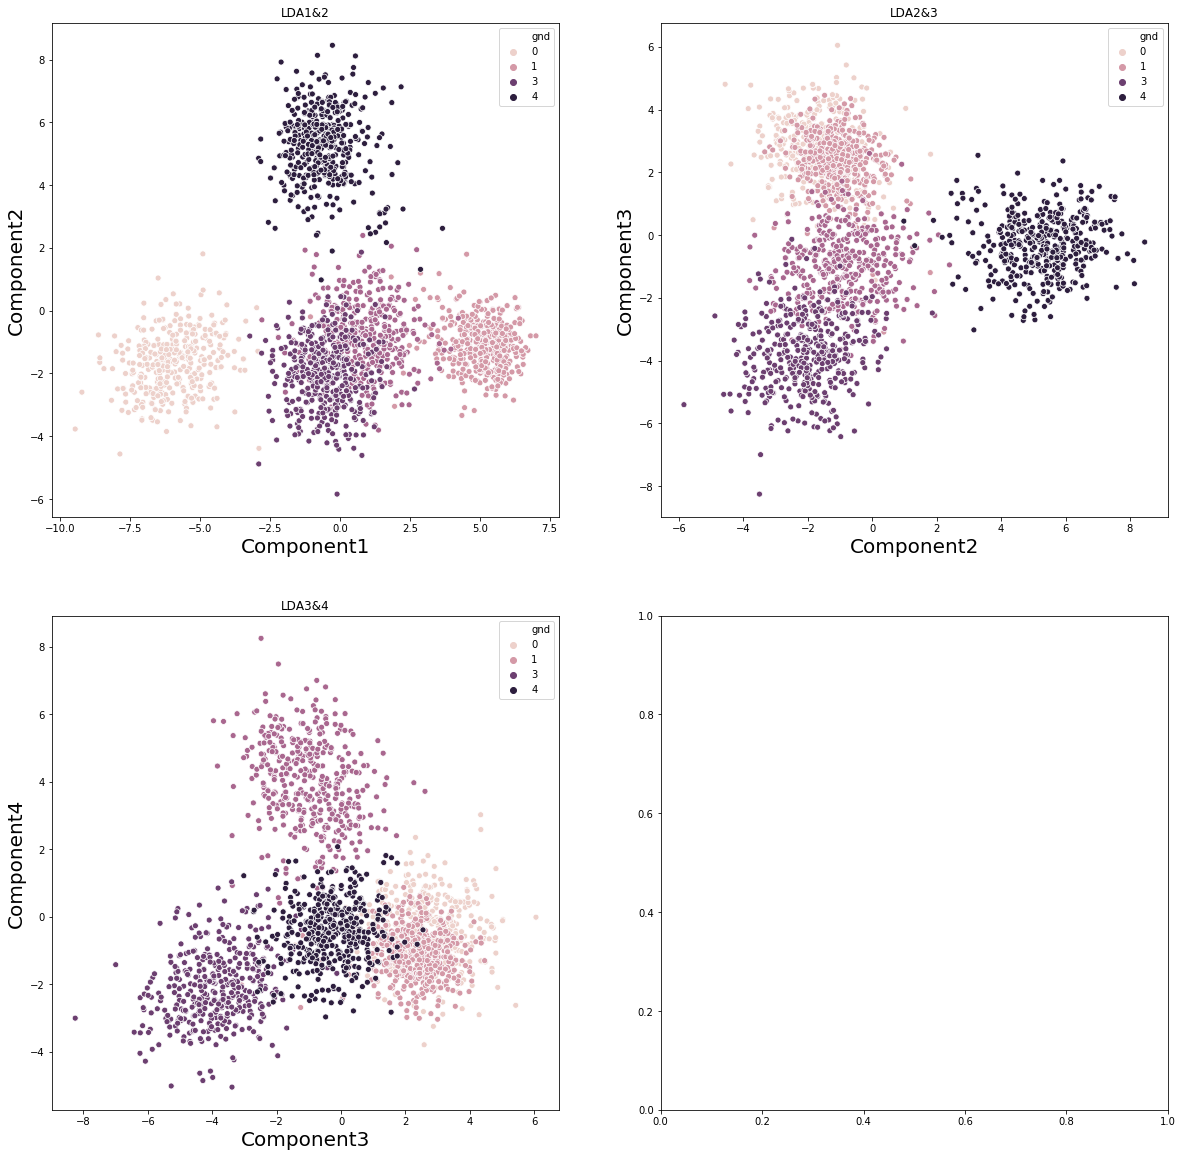

In [6]:
lda = LinearDiscriminantAnalysis()
lda.fit(features, dataB['gnd'])
LDA_transformed = lda.transform(features)

a, b = plt.subplots(2,2,figsize = (20,20))
for i in range (0,3):
    plt.subplot(2,2,i+1)
    subplt_lda = sns.scatterplot(x = LDA_transformed[:,i], y = LDA_transformed[:,i+1], hue = dataB['gnd'])
    plt.xlabel('Component' + str(i+1), fontsize = 20)
    plt.ylabel('Component' + str(i+2), fontsize = 20)
    print(subplt_lda)
    plt.title('LDA' + str(i+1) + '&'+ str(i+2))


### (2)

LDA seems have better classification on certain classes than PCA. LDA are more readable and more seperability on data. PCA usually have may overlapping points that we cannot tell which part is which. PCA is to make the mapped samples have the largest divergence. LDA is to make the mapped samples have the best classification performance. PCA is an unsupervised dimension reduction method, while LDA is a supervised dimension reduction method.
LDA minimizes the variance of within class and maximize the between class variance, which are more seperability on data than PCA does.

### 2.2.2 Theoretical Question

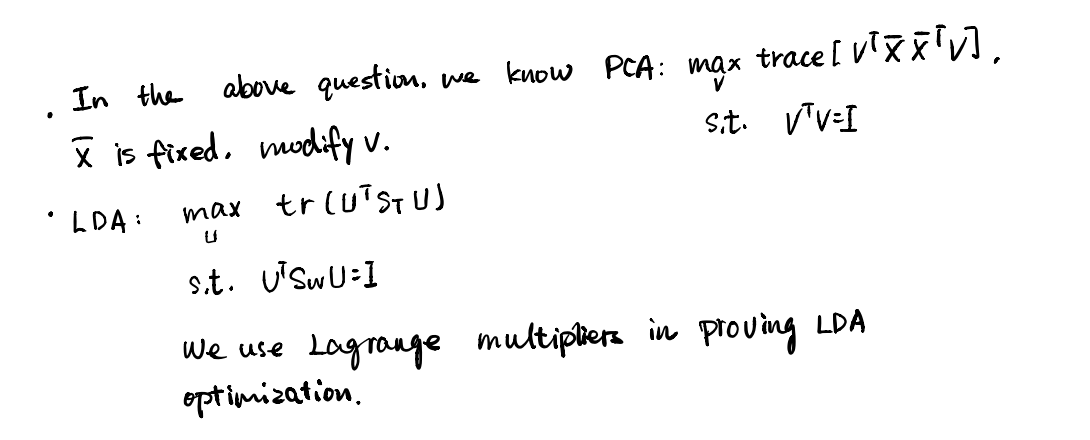

We will find the min variance of within class and max in the between class in LDA. But for PCA, we just use and consider the data as the whole set, just using the covariance and max it not within or between classes in dataset.

In practical part, PCA is hard to tell the classes from each other and usually overlapping together. But, LDA seperate better than PCA. It can almost tell the five classes in overview. Because, PCA max the whole covariance and LDA max the variance of between class. 
In theory,for PCA, components mean different eigenvectors. We usually get the largest eigenvalues and corresponding eigenvectors to be the first component. So, we may loss some information when using certain components. For LDA, components mean the max eigenvalue of each class. So components will have good result on seperating classes than PCA.